In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

import numpy as np
import re

In [110]:
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_colwidth', -1)

In [111]:
df=pd.read_csv('spill-incidents.csv')

In [112]:
df.head()

,Spill_Number,Program Facility_Name,Street_1,Street_2,Locality,County,ZIP_Code,SWIS_Code,DEC_Region,Spill_Date,Received_Date,Contributing_Factor,Waterbody,Source,Close_Date,Material_Name,Material_Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,2001-10-10T00:00:00,2001-10-10T00:00:00,Unknown,NaN,Unknown,2001-10-15T00:00:00,unknown material,Other,NaN,10.0,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21T00:00:00,2004-08-21T00:00:00,Other,EAST RIVER,Unknown,2004-09-17T00:00:00,raw sewage,Other,NaN,0.0,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21T00:00:00,2004-08-21T00:00:00,Other,EAST RIVER,Unknown,2004-09-17T00:00:00,raw sewage,Other,NaN,0.0,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,2002-08-02T00:00:00,2002-08-02T00:00:00,Equipment Failure,NaN,Commercial/Industrial,2002-10-28T00:00:00,transformer oil,Petroleum,NaN,1.0,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,2003-01-20T00:00:00,2003-01-20T00:00:00,Traffic Accident,NaN,Commercial/Industrial,2003-01-22T00:00:00,transformer oil,Petroleum,NaN,6.0,6.0


In [113]:
df.keys()

Index(['Spill_Number', 'Program Facility_Name', 'Street_1', 'Street_2',
       'Locality', 'County', 'ZIP_Code', 'SWIS_Code', 'DEC_Region',
       'Spill_Date', 'Received_Date', 'Contributing_Factor', 'Waterbody',
       'Source', 'Close_Date', 'Material_Name', 'Material_Family', 'Quantity',
       'Units', 'Recovered'],
      dtype='object')

In [114]:
df.Source.value_counts()

Commercial/Industrial                       138596
Private Dwelling                            101826
Unknown                                     54650 
Commercial Vehicle                          54078 
Institutional, Educational, Gov., Other     42689 
Gasoline Station or other PBS Facility      39075 
Passenger Vehicle                           13588 
Tank Truck                                  12366 
Transformer                                 7588  
Major Facility (MOSF) > 400,000 gal         5552  
Vessel                                      4726  
Non Major Facility > 1,100 gal              3646  
Railroad Car                                2238  
Missing Code in Old Data - Must be fixed    234   
Chemical Bulk Storage Facility              54    
Name: Source, dtype: int64

In [115]:
df.Material_Name.value_counts()

#2 fuel oil                                                                                             124174
gasoline                                                                                                58944 
unknown petroleum                                                                                       46928 
diesel                                                                                                  42405 
transformer oil                                                                                         25063 
hydraulic oil                                                                                           24690 
waste oil/used oil                                                                                      21031 
unknown material                                                                                        15764 
dielectric fluid                                                                                        12557 
m

In [116]:
df.Street_1.value_counts()

260 HUDSON RIVER ROAD                                1005
260 HUDSON RIVER RD                                  712 
240 AIRPORT ROAD                                     574 
BROADWAY                                             409 
MAIN STREET                                          406 
GAFB                                                 392 
425 PERINTON PARKWAY                                 353 
MAIN STREET                                          343 
PARK AVE EAST                                        339 
1 NORYL AVE                                          321 
OLD GLENHAM ROAD                                     305 
MAIN ST                                              298 
194 COUNTY ROUTE 45                                  291 
801 EAST 14TH STREET                                 291 
1 BELL CROSSING RD YARD                              278 
31-01 20 AVENUE                                      272 
1550 BALMER ROAD                                     253 
RIVER ROAD    

In [117]:
df['Open']=pd.to_datetime(df.Spill_Date, format='%Y/%m/%d') #df['Close_Date']
df['Close']=pd.to_datetime(df.Close_Date, format='%Y/%m/%d') #df['Close_Date']

In [118]:
len(df[df.Open>'2018.1.1'])

6922

In [119]:
len(df[df.Close>'2018.1.1'])

6742

In [136]:
df.keys()

Index(['Spill_Number', 'Program Facility_Name', 'Street_1', 'Street_2',
       'Locality', 'County', 'ZIP_Code', 'SWIS_Code', 'DEC_Region',
       'Spill_Date', 'Received_Date', 'Contributing_Factor', 'Waterbody',
       'Source', 'Close_Date', 'Material_Name', 'Material_Family', 'Quantity',
       'Units', 'Recovered', 'Open', 'Close', 'Region'],
      dtype='object')

In [137]:
df['Region']=df.DEC_Region.replace('1','Long Island').replace('2','New York City').replace('3','Lower Hudson Valley').replace('4','Capital Region/Northern Catskills').replace('5','Eastern Adirondacks/Lake Champlain').replace('6','Western Adirondacks/Eastern Lake Ontario').replace('7','Central New York').replace('8','Western Finger Lakes').replace('9','Western New York')

In [141]:
df[df.Locality=='HUDSON RIVER']

,Spill_Number,Program Facility_Name,Street_1,Street_2,Locality,County,ZIP_Code,SWIS_Code,DEC_Region,Spill_Date,...,Source,Close_Date,Material_Name,Material_Family,Quantity,Units,Recovered,Open,Close,Region
68052,8602131,BUCHANAN MARINE,STONY PT. (TOMPKINS COVE),NaN,HUDSON RIVER,Rockland,NaN,4400,3,1986-06-29T00:00:00,...,Vessel,1986-06-29T00:00:00,diesel,Petroleum,NaN,0.0,0.0,1986-06-29,1986-06-29,3
294036,1201891,ON HUDSON RIVER,BY INDIAN POINT POWER PLANT,NaN,HUDSON RIVER,Westchester,NaN,6022,3,2012-05-26T00:00:00,...,Unknown,2012-05-29T00:00:00,unknown material,Other,NaN,0.0,0.0,2012-05-26,2012-05-29,3


In [121]:
spills_2018=df[df.Open>'2018.1.1']

In [139]:
spills_2018.Region

113       5          
167       2          
180       7          
1405      5          
2441      5          
3488      8          
4844      7          
4948      3          
5344      2          
5928      9          
5987      8          
5991      8          
6350      2          
6541      5          
7176      2          
7247      7          
7299      9          
7689      2          
12213     7          
13063     7          
13160     7          
13176     7          
13258     3          
13259     3          
13563     2          
13832     4          
14620     3          
15114     8          
15115     8          
15116     5          
15724     2          
15862     9          
17930     7          
18245     7          
18261     5          
18310     5          
18311     5          
18312     5          
18313     5          
19299     2          
19728     2          
20129     3          
20940     8          
21321     5          
21432     8          
21442     

In [123]:
spills_2018.Material_Family.value_counts()

Petroleum             5759
Other                 1008
Hazardous Material    155 
Name: Material_Family, dtype: int64

Region 1:(Long Island) Nassau and Suffolk counties; Region 2: (New York City) Brooklyn, Bronx, Manhattan, Queens and Staten Island; Region 3: (Lower Hudson Valley) Dutchess, Orange, Putnam, Rockland, Sullivan, Ulster and Westchester counties; Region 4: (Capital Region/Northern Catskills) Albany, Columbia, Delaware, Greene, Montgomery, Otsego, Rensselaer, Schenectady and Schoharie counties; Region 5: (Eastern Adirondacks/Lake Champlain) Clinton, Essex, Franklin, Fulton, Hamilton, Saratoga, Warren and Washington counties; Region 6: (Western Adirondacks/Eastern Lake Ontario) Herkimer, Jefferson, Lewis, Oneida and St. Lawrence counties; Region 7: (Central New York) Broome, Cayuga, Chenango, Cortland, Madison, Onondaga, Oswego, Tioga and Tompkins counties; Region 8: (Western Finger Lakes) Chemung, Genesee, Livingston, Monroe, Ontario, Orleans, Schuyler, Seneca, Steuben, Wayne and Yates counties; Region 9: (Western New York) Allegany, Chautauqua, Cattaraugus, Erie, Niagara and Wyoming counties.

# Graphics

In [124]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family'         : 'arial',
    'font.style'          : 'normal',
    'font.variant'        : 'normal',
    'font.weight'         : 'light',
    'font.stretch'        : 'normal',
  'lines.linewidth': 2,
  'lines.solid_capstyle': 'butt',
  'legend.fancybox': True,

  'axes.prop_cycle': cycler('color', ['#00485C', '#EC8A6A','#04A5D3', '#5F8696', '#5FBD96', '#0074D9','#eccb6a','#ccec6a','#965f6b','#5D6D7E','#e0d2a5']),
  'axes.facecolor': '#ECDFBC',
  'axes.labelsize': 8,
  'axes.axisbelow': True,
  'axes.grid': True,
  'axes.edgecolor': 'Black',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
  'patch.edgecolor': 'black',
  'patch.linewidth': 0.5,
  'svg.fonttype': 'path',
  'grid.linestyle': '-',
  'grid.linewidth': 1.0,
  'grid.color': 'white',
  'xtick.major.size': 4,
  'xtick.minor.size': 4,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
  'font.size': 10.0,
  'savefig.edgecolor': '#ECDFBC',
  'savefig.facecolor': '#ECDFBC',
  'figure.subplot.left': 0.05,
  'figure.subplot.right': 0.95,
  'figure.subplot.bottom': 0.07,
  'figure.facecolor': '#ECDFBC',
  'legend.fancybox': True,
    
})

In [125]:
df.head()

,Spill_Number,Program Facility_Name,Street_1,Street_2,Locality,County,ZIP_Code,SWIS_Code,DEC_Region,Spill_Date,...,Source,Close_Date,Material_Name,Material_Family,Quantity,Units,Recovered,Open,Close,Region
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,2001-10-10T00:00:00,...,Unknown,2001-10-15T00:00:00,unknown material,Other,NaN,10.0,0.0,2001-10-10,2001-10-15,3
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21T00:00:00,...,Unknown,2004-09-17T00:00:00,raw sewage,Other,NaN,0.0,0.0,2004-08-21,2004-09-17,2
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21T00:00:00,...,Unknown,2004-09-17T00:00:00,raw sewage,Other,NaN,0.0,0.0,2004-08-21,2004-09-17,2
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,2002-08-02T00:00:00,...,Commercial/Industrial,2002-10-28T00:00:00,transformer oil,Petroleum,NaN,1.0,0.0,2002-08-02,2002-10-28,2
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,2003-01-20T00:00:00,...,Commercial/Industrial,2003-01-22T00:00:00,transformer oil,Petroleum,NaN,6.0,6.0,2003-01-20,2003-01-22,3


In [126]:
spills_2018.groupby('Material_Name').Units.sum().reset_index().plot(kind='barh',x='Material_Name', y='Units',figsize=(10,50))



In [127]:
df.keys()

Index(['Spill_Number', 'Program Facility_Name', 'Street_1', 'Street_2',
       'Locality', 'County', 'ZIP_Code', 'SWIS_Code', 'DEC_Region',
       'Spill_Date', 'Received_Date', 'Contributing_Factor', 'Waterbody',
       'Source', 'Close_Date', 'Material_Name', 'Material_Family', 'Quantity',
       'Units', 'Recovered', 'Open', 'Close', 'Region'],
      dtype='object')

In [128]:
hudson=df[df.Waterbody=='HUDSON RIVER']
hudson.Material_Family.value_counts()

Petroleum             1674
Other                 882 
Hazardous Material    83  
Name: Material_Family, dtype: int64

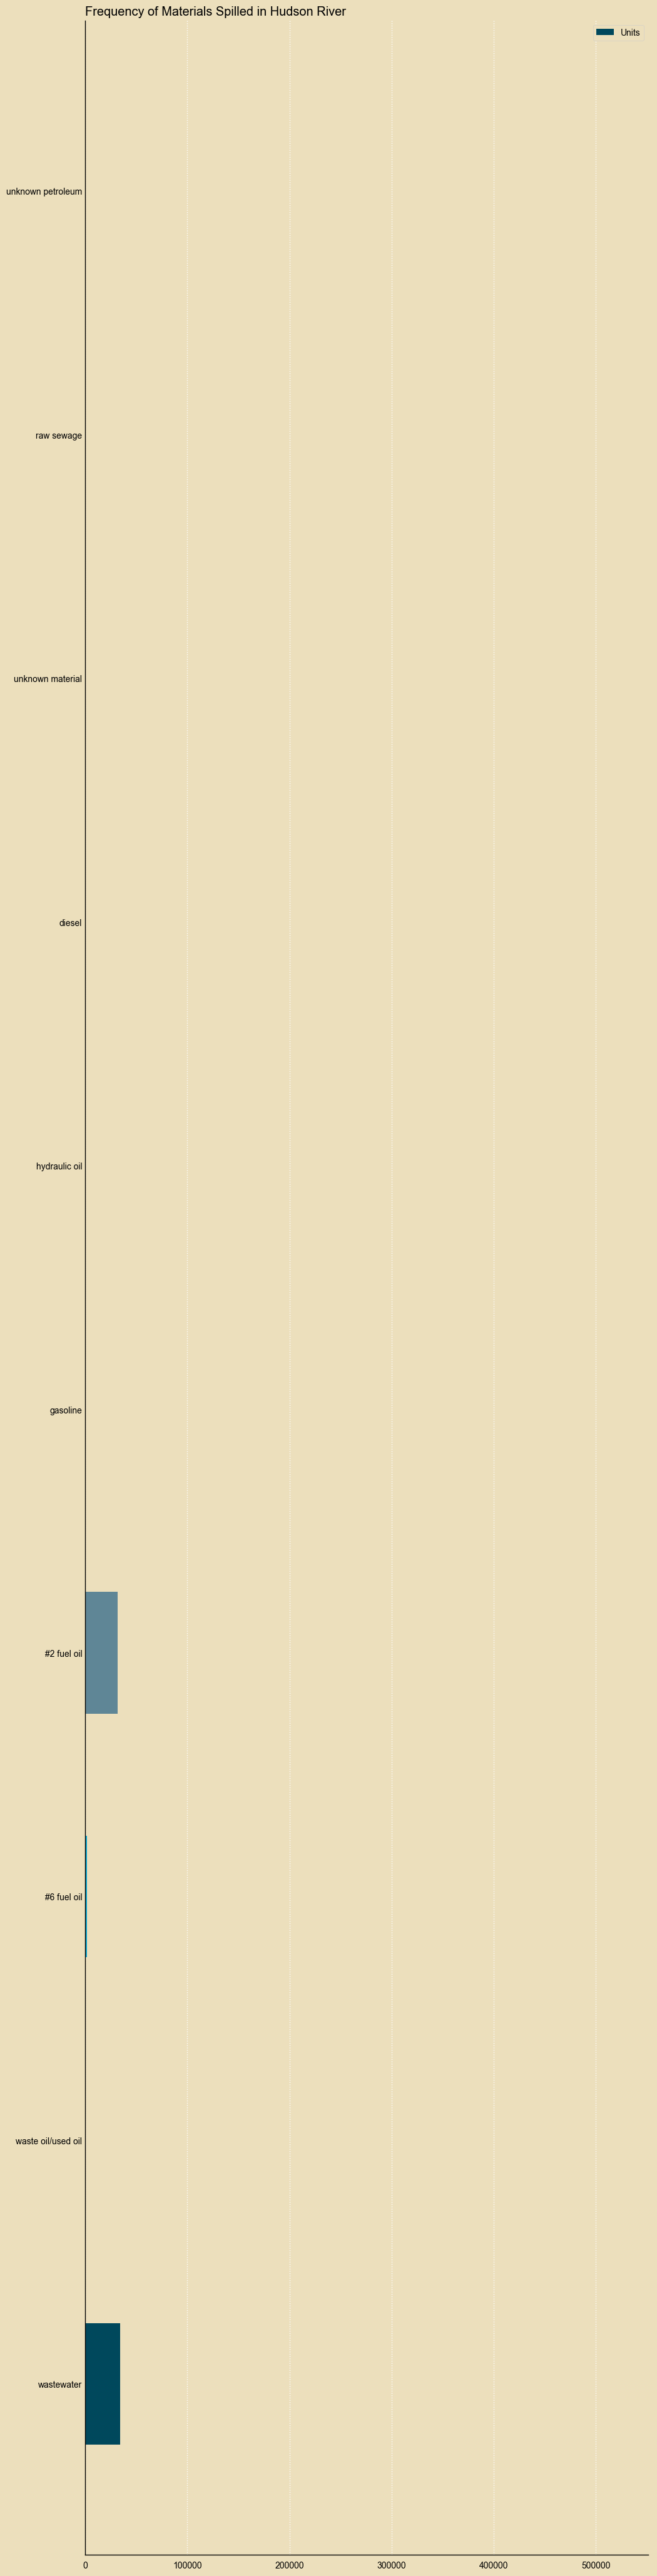

In [129]:
ax=hudson.Material_Name.value_counts().sort_values().tail(10).plot(kind='barh',x='Units',width=0.9, color='#82BAAD')

ax.set_title('Frequency of Materials Spilled in Hudson River', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)



ax.grid(True, axis='y', color='white', linestyle='')
ax.grid(True, axis='x', color='white', linestyle=':')

ax.set_xlabel("", fontname="Arial", fontsize=8)
# ax.set_xticklabels([2008, 2009, 2010,2011,2012,2013,2014,2015,2016])
# ax.set_yticklabels(['0', '200\nThousands', '400','600','800','1 million'], ha='right')

fig=plt.gca
# plt.gcf().text(0.89,0.65,'↑\n6%', ha='center',fontsize=12, color='black')

plt.savefig('Hudson1.png', dpi=100)
plt.show()

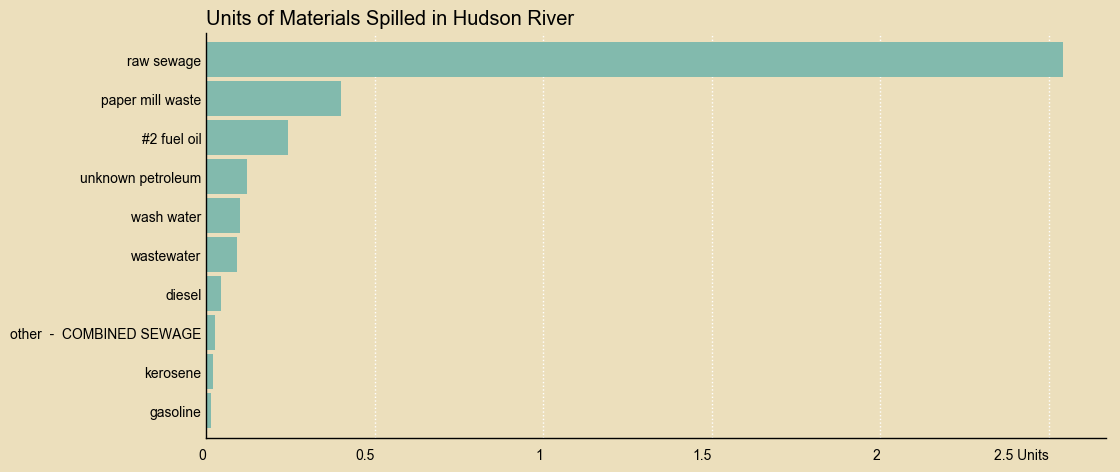

In [130]:
ax=hudson.groupby(['Material_Name']).Units.sum().sort_values().tail(10).plot(kind='barh',x='Units',width=0.9, color='#82BAAD',figsize=(10,5))

ax.set_title('Units of Materials Spilled in Hudson River', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)



ax.grid(True, axis='y', color='white', linestyle='')
ax.grid(True, axis='x', color='white', linestyle=':')

ax.set_xlabel("", fontname="Arial", fontsize=8)
# ax.set_xticklabels([2008, 2009, 2010,2011,2012,2013,2014,2015,2016])
ax.set_xticklabels(['0', '0.5', '1','1.5','2','2.5 Units'], ha='right')

fig=plt.gca
# plt.gcf().text(0.89,0.65,'↑\n6%', ha='center',fontsize=12, color='black')

plt.savefig('Hudson3.png', dpi=100)
plt.show()

In [131]:
hudson.Units.sum()/len(hudson)

13794.182504736644

In [132]:
hudson.Recovered.sum()/len(hudson)

35.1273247442213

In [133]:
len(hudson)

2639

In [144]:
len(hudson[hudson.Open>'2018/1/1'])

34